# Prepare

In [1]:
from SHZX_Modal_identification import *

## 绘制设备可用性视图

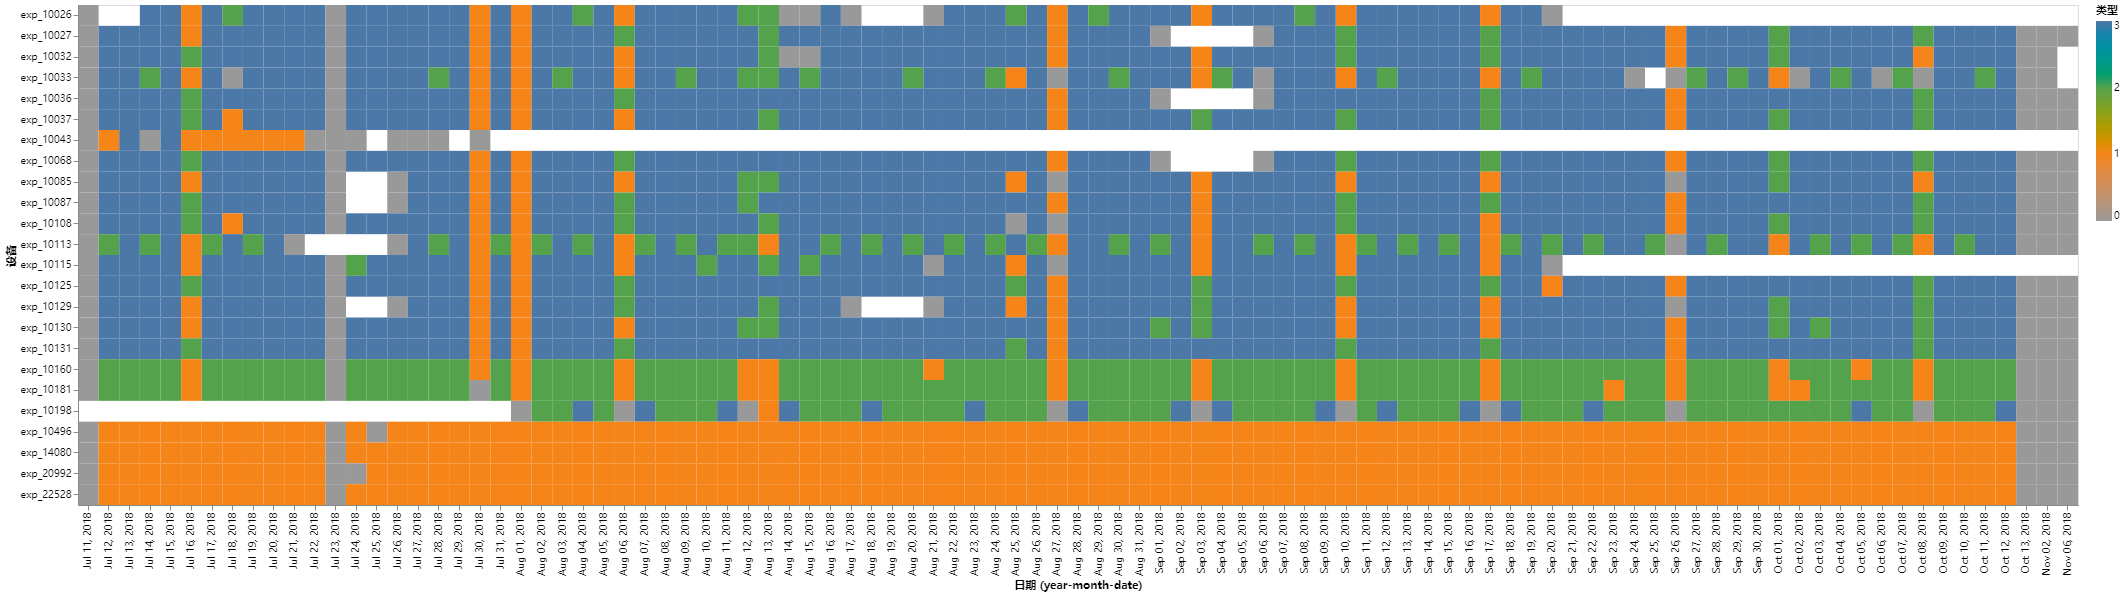

In [3]:
equipment_availability()

## 绘制测点可用性视图

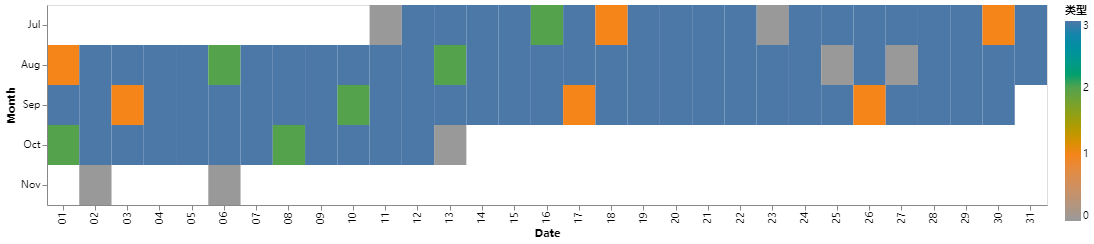

In [2]:
i_code = 'ZD-117-01'
which_dates_are_good(i_code)

## 数据批量导出

In [ ]:
%%time
# 90个文件，5.79G，本地下载并清洗，耗时 70 分钟
# 数据展示可以对单测点进行导出，此处是为了方便批量导出
date_start = '2018-7-11'; date_end = '2018-10-13'
# code_list = ['ZD-117-01','ZD-117-02','ZD-117-03','ZD-117-04',
#              'ZD-124-01','ZD-124-02','ZD-124-03','ZD-124-04',
#              'ZD-125-01','ZD-125-02','ZD-125-03','ZD-125-04',
#              'FS-132-01','FS-132-02'
#               ]
code_list = ['ZD-117-01']

date_list = get_date_list(date_start, date_end)
data_export(code_list, date_list)

# 数据分析

## ZD_std

In [ ]:
%%time
# 90个文件，计算出 10min STD 值，耗时 1分半
i_code_list = ['ZD-117-01']
date_start = '2018-7-11'; date_end = '2018-10-13'
resample_frequency = '10T'
for i_code in i_code_list:
    data = get_data_std(i_code, date_start, date_end, resample_frequency)
#     draw_ZD(data, i_code)

## Peak-Picking

In [69]:
%%time
# 1个文件，计算出 10min 频率值，耗时 2 分钟
# 参数设置
long = 5                    # 按分钟计，用于计算的数据长度
Fs = 100                    # 采样频率
new_f = 100                 # 降采样频率（避免滤波时数据溢出），也可用于增采样
filtering = [10,20]         # 通带频率、阻带频率
PSDfangfa = 1               # 1为周期图法，2为多个周期图平均法
m = 2                       # 平均周期图法的平分数
if_log = 0                  # 是否对结果取对数
draw = 0                    # 是否绘图
draw_matlab = 0             # 是否用matlab作图
percent = 10                # 峰值下限取最高点的百分之几
minpeakdist = 0.05          # 峰值之间最小距离

i_code_list = ['ZD-117-01']
date_start = '2018-7-12'; date_end = '2018-7-12'
resample_frequency = '10T'
for i_code in i_code_list:
    f = Peak_Picking(i_code,date_start,date_end,resample_frequency,long,Fs,new_f,filtering,PSDfangfa,m,if_log,draw,draw_matlab,percent,minpeakdist)
f

Wall time: 1min 52s


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
2018-07-12 00:00:00,0.110000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 00:10:00,0.106667,0.206667,0.323333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 00:20:00,0.106667,0.323333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 00:30:00,0.106667,0.323333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 00:40:00,0.106667,0.320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 00:50:00,0.110000,0.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 01:00:00,0.106667,0.323333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 01:10:00,0.106667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 01:20:00,0.106667,0.320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 01:30:00,0.106667,0.320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## SSICOV

In [85]:
%%time
# 1个文件，计算出 10min 频率值，耗时 6 分钟
# 参数设置
long = 5                # 按分钟计，用于计算的数据长度
Ts = 10                 # 按秒计 time lag for covariance calculation
Fs = 100                # 采样频率
new_f = 100             # 降采样频率（避免滤波时数据溢出），也可用于增采样
filtering = [10,20]   # 通带频率、阻带频率
if_log = 0              # 是否取对数
draw = 0                # 是否绘图
draw_matlab = 0         # 是否用matlab绘图
Xrange = [0,1]          # 绘图x轴范围
eps_freq = 1e-3         # 相对误差(频率)

i_code_group = ['ZD-117-01', 'ZD-117-01'] # 起码有两个
date_start = '2018-7-12'; date_end = '2018-07-13'
resample_frequency = '10T'
f = SSICOV(i_code_group,date_start,date_end,resample_frequency,long,Ts,Fs,new_f,filtering,if_log,draw,draw_matlab,Xrange,eps_freq)
f

Wall time: 5min 42s


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2018-07-12 00:00:00,0.106909,1.888213,2.162659,2.690310,3.345005,5.128764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 00:10:00,0.693015,1.895906,2.166540,2.530910,2.672293,4.503418,5.113380,5.978202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 00:20:00,0.106308,0.677316,1.894398,2.169304,2.686748,4.512616,5.981317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 00:30:00,0.106781,0.682735,1.899919,2.162500,2.692758,4.500515,5.978744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 00:40:00,0.105399,1.897439,2.156119,2.683067,4.493873,5.981800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 00:50:00,0.689073,1.897067,2.169262,2.689552,4.496905,5.127985,5.973287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 01:00:00,1.903204,2.169901,2.693491,4.503237,5.970225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 01:10:00,0.696413,1.892780,2.160783,2.686936,4.516927,5.978015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-12 01:20:00,0.106164,0.455416,0.687078,1.895023,2.157759,2.495674,2.673179,2.695131,4.503207,5.973924,NaN,NaN,NaN,NaN,NaN
2018-07-12 01:30:00,0.105721,0.686781,1.891439,2.157357,2.698657,5.979480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
